### Analyze Donald Trump's tweets from Jan 2015 (two years before he became president) until Jan 2019 (two years after he became President).  Group these tweets by year to show how his frequently tweeted words,  Twitter handles, and sentiment has changed over the last four years. Plot this pattern using appropriate graphics. 

### Present your code and results in a Jupyter notebook. Write your code in a succinct manner, avoiding unnecessary details or analysis, but use comment statements as needed. Submit your Jupyter file as the assignment deliverable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tweepy
import json
import datetime
from string import punctuation
import nltk

## Loading Tweet Archive for each year from 2015 - 2019

In [2]:
%cd E:\USF - BAIS\Text Analytics

E:\USF - BAIS\Text Analytics


In [54]:
#trump 2015 - 01/01/2015 to 12/31/2015
#trump 2016 - 01/01/2016 to 01/19/2017 (Day Before he became president)
#trump 2017 - 01/20/2017 to 01/20/2018 
#trump 2018 - 01/21/2018 to 01/20/2019

trumptweets= {}
for i in range(2015,2019):
    with open('trump'+str(i)+'.json', 'r',encoding= 'UTF-8') as fp: #loading JSON files
        trumpnew = json.load(fp)
        dataframe = pd.DataFrame(trumpnew) #Converting JSON content into dataframe
        dataframe['created_at'] = pd.to_datetime(dataframe['created_at']).dt.strftime("%b-%y") #extracting the month from 'created_at' column
        trumptweets[str(i)] = dataframe

In [174]:
trumptweets['2017'].head(3)

,created_at,favorite_count,id_str,source,text
0,Jan-18,117670,954541219970977793,Twitter for iPhone,Not looking good for our great Military or Saf...
1,Jan-18,65007,954478044487520257,Twitter for iPhone,Excellent preliminary meeting in Oval with @Se...
2,Jan-18,129151,954456754137501697,Twitter for iPhone,Just signed 702 Bill to reauthorize foreign in...


In [179]:
trumptweets['2015'].head(3)

,created_at,favorite_count,id_str,source,text
0,Dec-15,5715,682414759942184960,Twitter for Android,A GREAT day in South Carolina. Record crowd an...
1,Dec-15,3261,682413776600174592,Twitter for Android,"I predict that dying @UnionLeader newspaper, w..."
2,Dec-15,6992,682319510251159553,Twitter for iPhone,A lovely letter from the daughter of the late ...


## Plotting the tweet frequency by each year

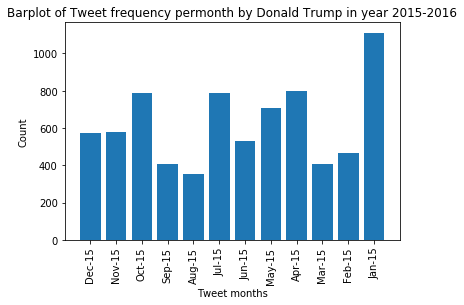

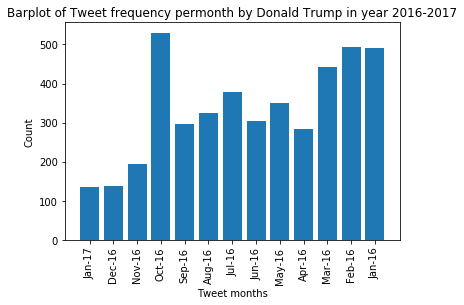

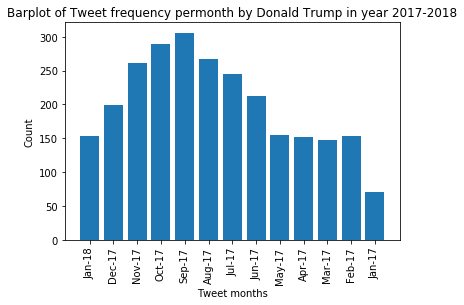

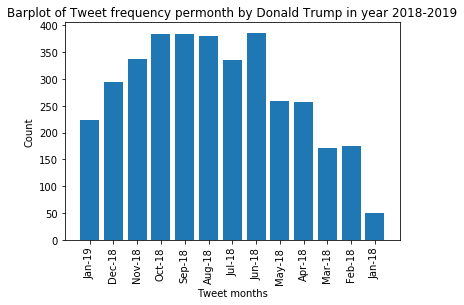

In [228]:
#Collecting the tweet frequency across all the months in 4 years!

for i in range (2015,2019):
    df = pd.DataFrame(trumptweets[str(i)])
    df['freq'] = df.groupby('created_at')['created_at'].transform('count')
    df = df[['created_at','freq']]
    df = df.drop_duplicates()
    # Source : https://stackoverflow.com/questions/22391433/count-the-frequency-that-a-value-occurs-in-a-dataframe-column/22391554
    
    #Bar plot for the tweet frequency
    plt.bar(df['created_at'],df['freq'] )
    plt.xlabel('Tweet months')
    plt.xticks(rotation=90)
    plt.ylabel('Count')
    plt.title('Barplot of Tweet frequency permonth by Donald Trump in year ' +  str(i)+ '-' + str(i+1))
    plt.show()

## Generating Tweet String and Tweet List

In [240]:
tweetstrings = {}

for i in range(2015,2019):
    stringkey = str(i)
    df = trumptweets[stringkey]
    tweetstring = ''
    
    for j in df.index:
        tweetstring = tweetstring + ' ' + df.loc[j, 'text']
        tweetstring = tweetstring.strip(punctuation).lower() #Removing Punctuations
        tweetstring = re.sub(r'http\S+', ' ', tweetstring) #Removing URLs start points
        tweetstring = re.sub(r'[!?\.]+', '', tweetstring) #Removing other characters from text
    tweetstrings[stringkey] = tweetstring #Storing the tweetstring in the dictionary for all the years
        
        #Source:  Professor's in class code

In [241]:
tweetstrings['2015'][0:1000] #Checking the tweetstring for year 2015

' a great day in south carolina record crowd and fantastic enthusiasm this is now a movement to make america great again i predict that dying @unionleader newspaper, which has been run into the ground by publisher "stinky" joe mcquaid, will be dead in 2 years a lovely letter from the daughter of the late great john wayne our country could use a john wayne right now   great poll- thank you nevada\n#makeamericagreatagain #trump2016   i\'m going to be live with @ericbolling and @kimguilfoyle to ring in the new year 2016 everybody should tune in to @foxnews tomorrow night thank you hilton head, south carolina #makeamericagreatagain #trump2016   thank you hilton head, south carolina @scteamtrump #trump2016     i never thought i\'d be saying this but i\'ve really enjoyed  @richlowry on television lately, and he was terrific hosting @seanhannity joe mcquaid (@deucecrew) is desperately trying to sell the @unionleader it\'s a loser, and my comments haven\'t helped him much the dying @unionleade

In [95]:
#Creating Tweetlist that can be later used in Sentiment Analysis

tweetlists = {}

for i in range(2015,2019):
    stringkey = str(i)
    df = trumptweets[stringkey]
    tweetlist = []
    
    for j in df.index: #Source :  Professor's in class Code
        tweetlist.append(df.loc[j, 'text']) 
    tweetlists[stringkey] = tweetlist #Storing the tweetstring in the dictionary for all the years

In [242]:
tweetlists['2016'][0:3] #checking tweetlist for year 2016

['Thank you to our amazing Wounded Warriors for their service. It was an honor to be with them tonight in D.C.… https://t.co/Qj5cpfaykD',
 'Great seeing @TheLeeGreenwood  and Kimberly at this evenings VP dinner! #GodBlessTheUSA https://t.co/SxVmaWvOFT',
 'Looking forward to a speedy recovery for George and Barbara Bush, both hospitalized. Thank you for your wonderful letter!']

In [8]:
#Seperating words from the tweetstring created above and creating handles and hashtags collections:

words_collection = {}
hashtags_collection = {}
handles_collection = {}

for i in range (2015,2019):
    words = []
    wordkey = str(i)
    words = tweetstrings[wordkey].split()
    words_collection[wordkey] = words
    hashtags = []
    handles = []
    for w in words: #Source :  Professor's in class Code
        if re.search(r'^#\w+', w):
            hashtags.append(w)
        if re.search(r'^@\w+', w):
            handles.append(w)
            
            
           
    hashtags_collection[str(i)] = hashtags
    handles_collection[str(i)] = handles

In [9]:
#Cleaning the Handles and Hashtags

for i in range (2015,2019):
    handles = handles_collection[str(i)]
    clean_handles = []
    for h in handles:
        newHandle = re.sub(r'\'\"[:-;,!?\.]+','', h)
        clean_handles.append(newHandle)
        
handles_collection[str(i)] = clean_handles

for i in range (2015,2019):
    hashtags = hashtags_collection[str(i)]
    clean_hashtags = []
    for h in hashtags:
        newHashtag = re.sub(r'\'\"[:-;,!?\.]+','', h)
        clean_hashtags.append(newHashtag)
        
hashtags_collection[str(i)] = clean_hashtags


In [10]:
handles_collection['2015'].count('@realdonaldtrump') #checking the count for @realdonaldtrump

3093

In [11]:
#Handles for all the years

handles_count = {}

for i in range (2015,2019):
    handleskeys = str(i)
    year_handlesvalue = []
    year_handles = {}
    for j in handles_collection[str(i)]:
        year_handleskey = str(j)
        #year_clean_handles = re.sub(r'[:-;,!?\.]+', '', year_handleskey)
        year_handlesvalue = handles_collection[str(i)].count(year_handleskey)
        year_handles[year_handleskey] = year_handlesvalue
        
    handles_count[handleskeys] = year_handles   
        

In [93]:
handles_count['2016']

{'@theleegreenwood': 1,
 '@thealabamaband': 1,
 '@nbc': 4,
 '@wsj': 10,
 '@nbcnews': 11,
 '@ainsleyearhardt': 1,
 '@foxandfriends': 37,
 '@erictrump:': 22,
 '@golfdigest': 1,
 '@realdonaldtrump': 373,
 '@moskowitzeva:': 1,
 '@betsydevos': 1,
 '@ivanka': 1,
 '@cnn,': 7,
 '@foxnews': 92,
 '@oann': 2,
 '@cnn': 93,
 '@lbperfectmaine': 1,
 '@michaelcohen212:': 1,
 '@meetthepress:': 1,
 '@kellyannepolls:': 4,
 '@meetthepress': 8,
 '@chucktodd': 6,
 '@erictrump': 15,
 '@ivankatrump:': 10,
 '@donaldjtrumpjr:': 15,
 '@laraleatrump': 1,
 '@reince:': 2,
 '@danscavino:': 17,
 '@teamtrump-': 1,
 '@realdonaldtrump:': 4,
 '@donaldjtrumpjr': 13,
 '@american32,': 1,
 '@jimbrownnfl32': 2,
 '@realdonaldtrump;': 1,
 '@realdonaldtrump--the': 1,
 '@vanityfair': 1,
 '@billgates': 1,
 '@nbcnightlynews': 1,
 '@foxnewssunday:': 1,
 '@foxnewssunday': 3,
 '@trumpinaugural:': 1,
 '@mike_pence': 34,
 '@rudygiuliani,': 1,
 '@todayshow': 5,
 '@realbencarson': 7,
 '@mike_pence,': 2,
 '@stevedoocy': 1,
 "@realdonaldtru

### Top 20 handles of year 2015-16

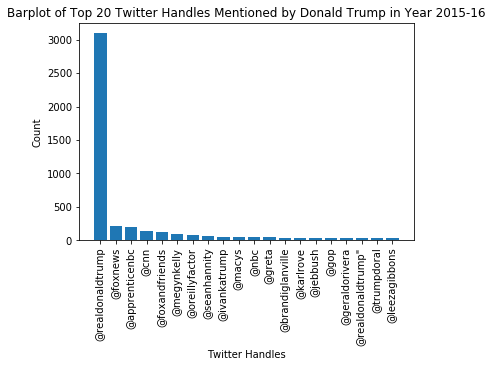

In [87]:
#For Year 2015-16 -  Handles Frequency
handleslist_freq2015 = []

for key, value in handles_count['2015'].items(): #Source :  Professor's in class Code
    handleslist_freq2015.append((value, key))
    
handleslist_freq2015.sort(reverse=True)
top20_2015 = handleslist_freq2015[0:20]
values, handlenames = zip(*top20_2015)
top20_2015[0:5]

plt.bar(handlenames, values)
plt.xlabel('Twitter Handles')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Barplot of Top 20 Twitter Handles Mentioned by Donald Trump in Year 2015-16')
plt.show()

### Top 20 handles of year 2016-17

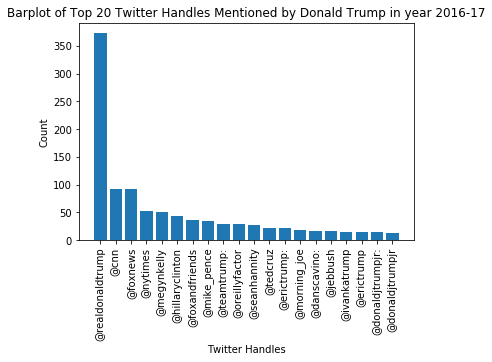

In [85]:
#For Year 2016-17 -  Handles Frequency
handleslist_freq2016 = []

for key, value in handles_count['2016'].items(): #Source :  Professor's in class Code
    handleslist_freq2016.append((value, key))
    
handleslist_freq2016.sort(reverse=True)
top20_2016 = handleslist_freq2016[0:20]
values, handlenames = zip(*top20_2016)
top20_2016[0:5]

plt.bar(handlenames, values)
plt.xlabel('Twitter Handles')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Barplot of Top 20 Twitter Handles Mentioned by Donald Trump in year 2016-17')
plt.show()

### Top 20 handles of year 2017-18

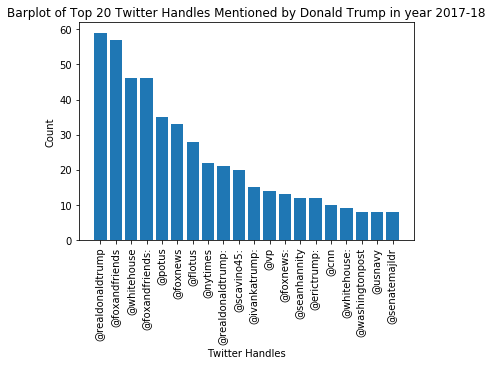

In [84]:
#For Year 2017-18 -  Handles Frequency
handleslist_freq2017 = []

for key, value in handles_count['2017'].items(): #Source :  Professor's in class Code
    handleslist_freq2017.append((value, key))
    
handleslist_freq2017.sort(reverse=True)
top20_2017 = handleslist_freq2017[0:20]
values, handlenames = zip(*top20_2017)
top20_2017[0:5]

plt.bar(handlenames, values)
plt.xlabel('Twitter Handles')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Barplot of Top 20 Twitter Handles Mentioned by Donald Trump in year 2017-18')
plt.show()

### Top 20 handles of year 2018-19

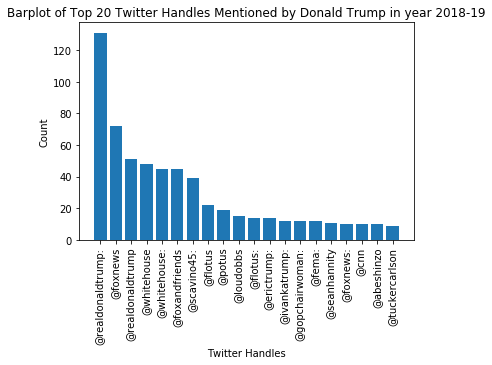

In [83]:
#For Year 2018-19 -  Handles Frequency
handleslist_freq2018 = []

for key, value in handles_count['2018'].items(): #Source :  Professor's in class Code
    handleslist_freq2018.append((value, key))
    
handleslist_freq2018.sort(reverse=True)
top20_2018 = handleslist_freq2018[0:20]
values, handlenames = zip(*top20_2018)
top20_2018[0:5]

plt.bar(handlenames, values)
plt.xlabel('Twitter Handles')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Barplot of Top 20 Twitter Handles Mentioned by Donald Trump in year 2018-19')
plt.show()

## Frequent words extraction

In [231]:
#replacing handles and hashtags with blank space!
tweetstringsNew = {}
for i in range(2015,2019):
    string = tweetstrings[str(i)]
    string = re.sub(r'@\S+', ' ',string) #removing tweet mentions
    string = re.sub(r'#\S+', ' ',string) #removing hashtags
    string = re.sub(r'&\w+', ' ',string) #removing &
    string = re.sub(r'[^a-z\s]+', ' ',string) #removing single letters
    string = re.sub(r'\s\w\s', ' ',string) #removing unicode word character
    string = string.lower() #converting word to lower
    
    tweetstringsNew[str(i)] = string
        

In [232]:
tweetstringsNew['2015'][0:1000]

' great day in south carolina record crowd and fantastic enthusiasm this is now movement to make america great again predict that dying   newspaper  which has been run into the ground by publisher  stinky  joe mcquaid  will be dead in   years lovely letter from the daughter of the late great john wayne our country could use john wayne right now   great poll  thank you nevada\n      going to be live with   and   to ring in the new year   everybody should tune in to   tomorrow night thank you hilton head  south carolina       thank you hilton head  south carolina         never thought be saying this but ve really enjoyed    on television lately  and he was terrific hosting   joe mcquaid    is desperately trying to sell the   it loser  and my comments haven helped him much the dying   newspaper in nh is in turmoil over my comments about them  like bully that got knocked out          good morning  mr trump you re so awesome               wow fantastic who knew americans were so smart great

In [233]:
Words_collection = {}

for i in range (2015,2019):
    words = []
    words = tweetstringsNew[str(i)].split()
    
    Words_collection[str(i)] = words

In [234]:
Words_collection['2015'][0:10]

['great',
 'day',
 'in',
 'south',
 'carolina',
 'record',
 'crowd',
 'and',
 'fantastic',
 'enthusiasm']

In [235]:
from nltk.corpus import stopwords

cleaned_words = {}

for i in range (2015,2019):
    word = Words_collection[str(i)]
    cleaned = []
    for j in word:
        if j not in stopwords.words('english'):
            wordtest = j
            #print(wordtest)
            cleaned.append(wordtest)
            continue
        
    cleaned_words[str(i)] = cleaned


In [237]:
cleaned_words['2015'][0:10]

['great',
 'day',
 'south',
 'carolina',
 'record',
 'crowd',
 'fantastic',
 'enthusiasm',
 'movement',
 'make']

In [238]:
Words_collection['2015'][0:10] #comparing with raw word list

['great',
 'day',
 'in',
 'south',
 'carolina',
 'record',
 'crowd',
 'and',
 'fantastic',
 'enthusiasm']

#### We have succesfully reomved the stopwords like 'in', 'and', 'to' etc.

## Stemming and Word Frequency

In [49]:
stemmed_words = {}

for i in range(2015,2019):
    pstemmed = []
    porter = nltk.stem.PorterStemmer()
    for w in cleaned_words[str(i)]:
        pstemmed.append(porter.stem(w))
        
    stemmed_words[str(i)] = pstemmed 
        
            
#len(pstemmed)
#len(list(set(pstemmed)))

In [251]:
stemmed_words['2015'][0:10]

['great',
 'day',
 'south',
 'carolina',
 'record',
 'crowd',
 'fantast',
 'enthusiasm',
 'movement',
 'make']

In [50]:
words_count = {}

for i in range (2015,2019):
    wordskeys = str(i)
    year_wordsvalue = []
    year_words = {}
    for j in stemmed_words[str(i)]:
        year_wordskey = str(j)
        #year_clean_handles = re.sub(r'[:-;,!?\.]+', '', year_handleskey)
        year_wordsvalue = stemmed_words[str(i)].count(year_wordskey)
        year_words[year_wordskey] = year_wordsvalue
    
    words_count[wordskeys] = year_words

In [253]:
words_count['2015']

{'great': 1049,
 'day': 109,
 'south': 43,
 'carolina': 43,
 'record': 61,
 'crowd': 109,
 'fantast': 70,
 'enthusiasm': 5,
 'movement': 5,
 'make': 482,
 'america': 502,
 'predict': 16,
 'die': 25,
 'newspap': 6,
 'run': 512,
 'ground': 9,
 'publish': 2,
 'stinki': 1,
 'joe': 13,
 'mcquaid': 4,
 'dead': 10,
 'year': 134,
 'love': 356,
 'letter': 9,
 'daughter': 13,
 'late': 18,
 'john': 41,
 'wayn': 9,
 'countri': 324,
 'could': 76,
 'use': 98,
 'right': 170,
 'poll': 339,
 'thank': 703,
 'nevada': 8,
 'go': 366,
 'live': 126,
 'ring': 14,
 'new': 289,
 'everybodi': 15,
 'tune': 41,
 'tomorrow': 99,
 'night': 148,
 'hilton': 2,
 'head': 50,
 'never': 165,
 'thought': 44,
 'say': 226,
 'realli': 179,
 'enjoy': 96,
 'televis': 33,
 'terrif': 15,
 'host': 33,
 'desper': 19,
 'tri': 67,
 'sell': 15,
 'loser': 43,
 'comment': 32,
 'help': 52,
 'much': 143,
 'nh': 28,
 'turmoil': 3,
 'like': 323,
 'bulli': 3,
 'got': 111,
 'knock': 2,
 'good': 228,
 'morn': 67,
 'mr': 222,
 'trump': 1688,
 

## Most Popular Words by Frequency Plot for each year

### Popular words for year 2015-16

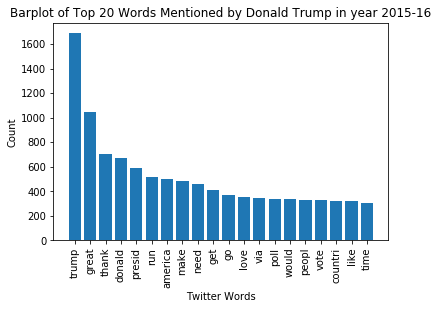

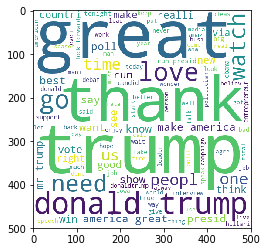

In [265]:
#For Year 2015-16 -  Words Frequency
wordlist_freq2015 = []

for key, value in words_count['2015'].items():
    wordlist_freq2015.append((value, key))
    
wordlist_freq2015.sort(reverse=True)
top20words_2015 = wordlist_freq2015[0:20]
values, word = zip(*top20words_2015)
top20words_2015[0:5]

plt.bar(word, values)
plt.xlabel('Twitter Words')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Barplot of Top 20 Words Mentioned by Donald Trump in year 2015-16')
plt.show()

#Plotting WordCloud
text_corpus = ' '.join(stemmed_words['2015'])

wordcloud = WordCloud(width=500, height=500, background_color='white', 
            min_font_size =12).generate(text_corpus)
plt.imshow(wordcloud)
plt.show()


### Popular words for year 2016-17

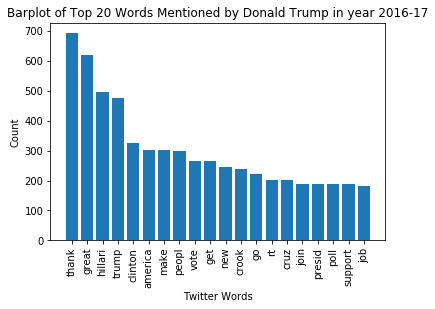

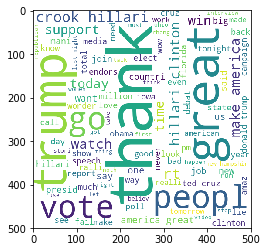

In [266]:
#For Year 2016-17 -  Words Frequency
wordlist_freq2016 = []

for key, value in words_count['2016'].items():
    wordlist_freq2016.append((value, key))
    
wordlist_freq2016.sort(reverse=True)
top20words_2016 = wordlist_freq2016[0:20]
values, word = zip(*top20words_2016)
top20words_2016[0:5]

plt.bar(word, values)
plt.xlabel('Twitter Words')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Barplot of Top 20 Words Mentioned by Donald Trump in year 2016-17')
plt.show()

#Plotting WordCloud
text_corpus = ' '.join(stemmed_words['2016'])

wordcloud = WordCloud(width=500, height=500, background_color='white', 
            min_font_size =12).generate(text_corpus)
plt.imshow(wordcloud)
plt.show()

### Popular words for year 2017-18

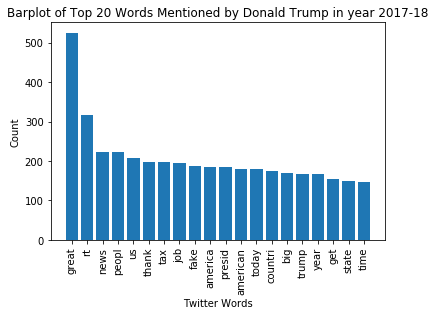

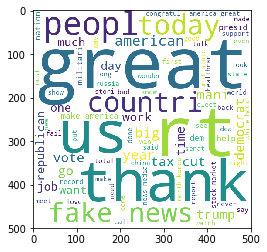

In [267]:
#For Year 2017-18 -  Words Frequency
wordlist_freq2017 = []

for key, value in words_count['2017'].items():
    wordlist_freq2017.append((value, key))
    
wordlist_freq2017.sort(reverse=True)
top20words_2017 = wordlist_freq2017[0:20]
values, word = zip(*top20words_2017)
top20words_2017[0:5]

plt.bar(word, values)
plt.xlabel('Twitter Words')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Barplot of Top 20 Words Mentioned by Donald Trump in year 2017-18')
plt.show()

#Plotting WordCloud
text_corpus = ' '.join(stemmed_words['2017'])

wordcloud = WordCloud(width=500, height=500, background_color='white', 
            min_font_size =12).generate(text_corpus)
plt.imshow(wordcloud)
plt.show()

### Popular words for year 2018-19

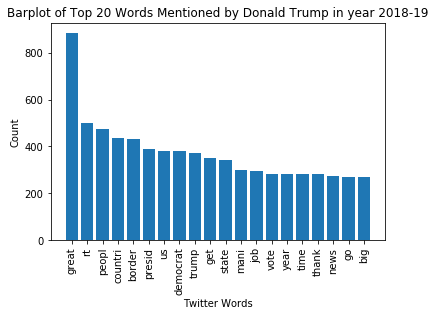

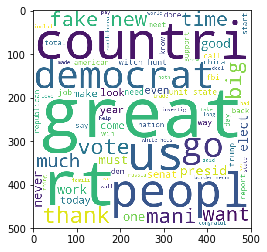

In [268]:
#For Year 2018-19 -  Words Frequency
wordlist_freq2018 = []

for key, value in words_count['2018'].items():
    wordlist_freq2018.append((value, key))
    
wordlist_freq2018.sort(reverse=True)
top20words_2018 = wordlist_freq2018[0:20]
values, word = zip(*top20words_2018)
top20words_2018[0:5]

plt.bar(word, values)
plt.xlabel('Twitter Words')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Barplot of Top 20 Words Mentioned by Donald Trump in year 2018-19')
plt.show()

#Plotting WordClould
text_corpus = ' '.join(stemmed_words['2018'])

wordcloud = WordCloud(width=500, height=500, background_color='white', 
            min_font_size =12).generate(text_corpus)
plt.imshow(wordcloud)
plt.show()

## Sentiment Analysis

In [124]:
tweetlists['2015'] 

['A GREAT day in South Carolina. Record crowd and fantastic enthusiasm. This is now a movement to MAKE AMERICA GREAT AGAIN!',
 'I predict that dying @UnionLeader newspaper, which has been run into the ground by publisher "Stinky" Joe McQuaid, will be dead in 2 years!',
 'A lovely letter from the daughter of the late great John Wayne. Our country could use a John Wayne right now. https://t.co/RhN5gVNBqM',
 'Great poll- thank you Nevada!\n#MakeAmericaGreatAgain #Trump2016 https://t.co/9Lr1v6vjJb',
 "I'm going to be live with @ericbolling and @kimguilfoyle to ring in the New Year 2016. Everybody should tune in to @foxnews tomorrow night!",
 'Thank you Hilton Head, South Carolina! #MakeAmericaGreatAgain #Trump2016 https://t.co/TBAD5MeYCE',
 'Thank you Hilton Head, South Carolina! @SCTeamTrump #Trump2016 https://t.co/RLCz17tIas https://t.co/L5IAlbsdkw',
 "I never thought I'd be saying this but I've really enjoyed  @RichLowry on television lately, and he was terrific hosting @seanhannity",
 

In [134]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
sentiment = {}
sentiment_year = {}

#Source : Professor's InClass code

for i in range (2015,2019):
    polarity = [0]*len(tweetlists[str(i)])
    Pol_scores = []
    #tweet_words = tweetlists[str(i)].split()
    #tweet_words = [w for w in tweet_words if w not in stop_words]

    for j, tweet in enumerate(tweetlists[str(i)]):
        tweet = tweet.strip(punctuation).lower()
        tweet = re.sub(r'http\S+', ' ', tweet)
        tweet = re.sub(r'@\S+', ' ',tweet) #removing tweet mentions
        tweet = re.sub(r'#\S+', ' ',tweet) #removing hashtags
        tweet = re.sub(r'&\w+', ' ',tweet) #removing &
        tweet = re.sub(r'[^a-z\s]+', ' ',tweet) #removing single letters
        sentiment[j] = analyzer.polarity_scores(tweet)
        #print(sentiment[j], tweet)
        polarity[j] = sentiment[j]['compound']
        Pol_scores.append(polarity[j])
    sentiment_year[str(i)] = Pol_scores

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [136]:
sentiment_year['2015'][0:10] #Checking Polarity for year 2015 for 1st 10 tweets

[0.9403, -0.7783, 0.836, 0.765, 0.0, 0.3612, 0.3612, 0.8761, -0.7184, 0.0]

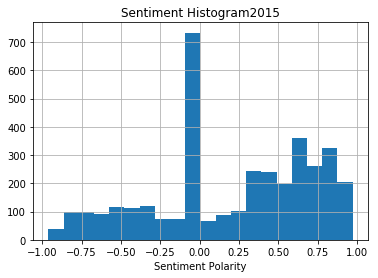

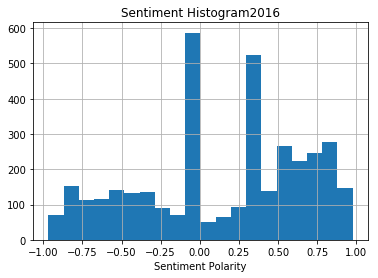

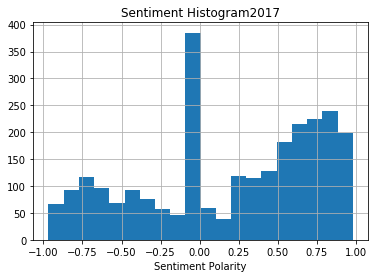

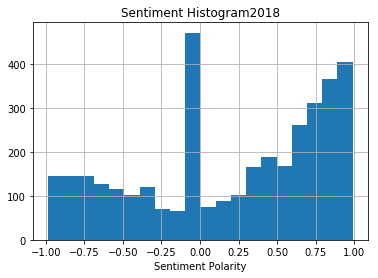

In [247]:
#Plotting Histigram of the Polarities across all the years

for i in range (2015,2019):
    df[str(polarity)+str(i)] = pd.DataFrame(sentiment_year[str(i)])
    df[str(polarity)+str(i)].hist(bins=20)
    plt.title('Sentiment Histogram'+str(i))
    plt.xlabel('Sentiment Polarity')
    plt.show()
        

## Polarity Calculation and Summary

In [166]:

for i in range (2015,2019):
    df[str(polarity)+str(i)] = pd.DataFrame(sentiment_year[str(i)])
    p = 0
    n = 0
    ne = 0
    year = str(i)
    for a in range(len(df[str(polarity)+str(i)])):
        if df[str(polarity)+str(i)][a] >= 0.05: #Source : https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/
            p = p+1
        elif df[str(polarity)+str(i)][a] <= -0.05:
            n = n+1
        else:
            ne = ne+1
    positive =round((p/len(df))*100)
    neutral = round((ne/len(df))*100)
    negative = round((n/len(df))*100)
    
    print(('For Year '+ year + ' Donald Trump\'s tweet analysis is : \n' ) + ('\n') +
    ('Total ' + str(p) + ' tweets are positive which is ' +  str(positive) + '%  of total tweets \n') +
    ('Total ' + str(ne) + ' tweets are neutral which is ' +  str(neutral) + '%  of total tweets \n')+
    ('Total ' + str(n) + ' tweets are negative which is ' +  str(negative) + '%  of total tweets \n'))
          

For Year 2015 Donald Trump's tweet analysis is : 

Total 2059 tweets are positive which is 57%  of total tweets 
Total 729 tweets are neutral which is 20%  of total tweets 
Total 849 tweets are negative which is 23%  of total tweets 

For Year 2016 Donald Trump's tweet analysis is : 

Total 2012 tweets are positive which is 55%  of total tweets 
Total 581 tweets are neutral which is 16%  of total tweets 
Total 1044 tweets are negative which is 29%  of total tweets 

For Year 2017 Donald Trump's tweet analysis is : 

Total 1502 tweets are positive which is 41%  of total tweets 
Total 1392 tweets are neutral which is 38%  of total tweets 
Total 743 tweets are negative which is 20%  of total tweets 

For Year 2018 Donald Trump's tweet analysis is : 

Total 2108 tweets are positive which is 58%  of total tweets 
Total 463 tweets are neutral which is 13%  of total tweets 
Total 1066 tweets are negative which is 29%  of total tweets 



<b>For year 2015 the positive tweet count was more than neutral or negative tweet counts<b>
    
<b>For year 2016 we can see a sudden surge of positive tweets with polarity around 0.25 and overall increase in positive tweet sentiments. This could be the year before election where he must be promoting himself and praising his afflicates ! 
<b>For 2016, the count and value of negative sentiments for the tweets also increased as trashing the opponents down could also be the major content in his tweets ! The most frequent words used graph for year 2016 shows 'hilari' and 'crook' in top 10 ! hence this can be justified (29% negative tweets)<b>

<b>For year 2017 and 2018, the frequency and value of the positive sentiments has increased gradually ! May be trump is doing a good job although his famous words like 'Fake News' and negative sentiments were associated with it which is (29% negative Tweets) highest % of negative sentiment tweets he has done over the 4 years after 2016<b> 